# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Load Data

In [4]:
df = pd.read_csv("data.csv",sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Cleaning, Information & Visualization

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
df.shape

(4424, 37)

In [7]:
df.size

163688

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [9]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [15]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [12]:
df['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='Count'>

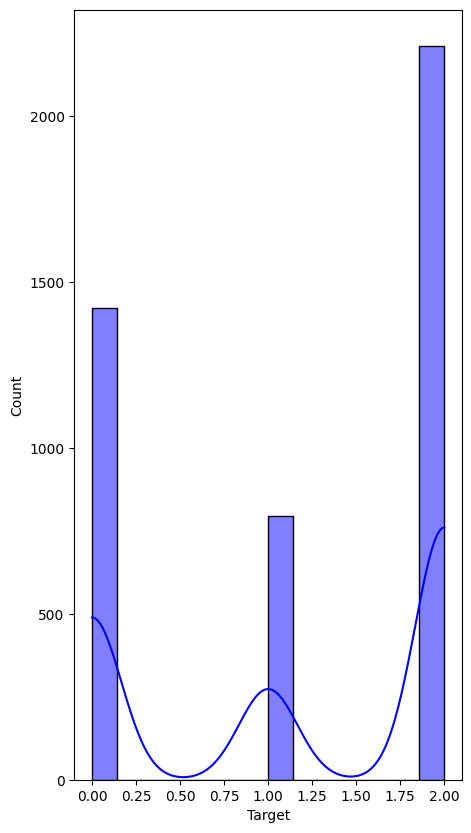

In [20]:
plt.figure(figsize=(5, 10))
sns.histplot(df['Target'], color="Blue", kde=True)


Text(0.5, 1.0, 'Target')

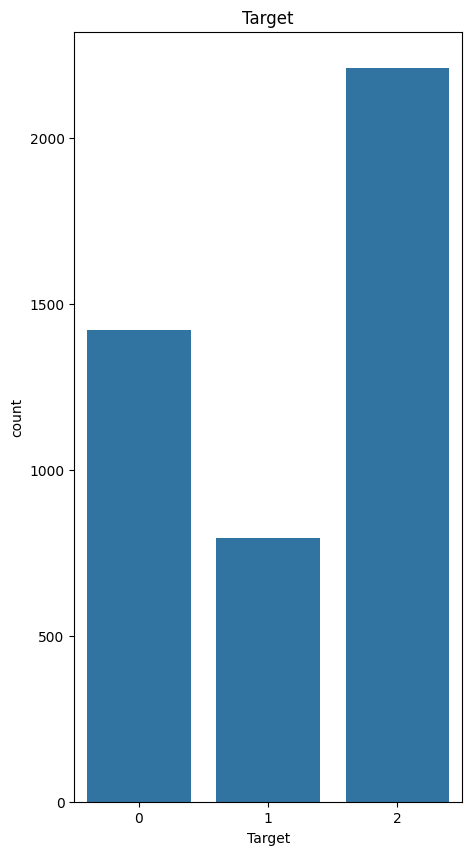

In [21]:
plt.figure(figsize=(5, 10))
sns.countplot(data = df, x="Target").set_title('Target')

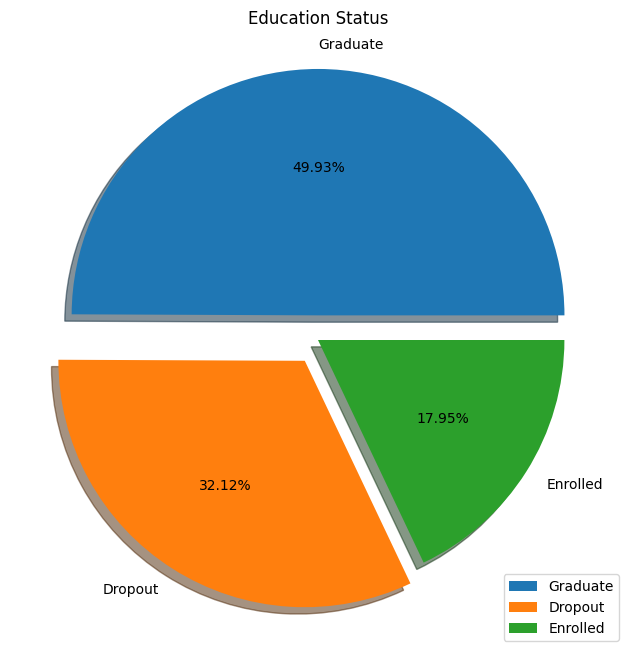

In [22]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

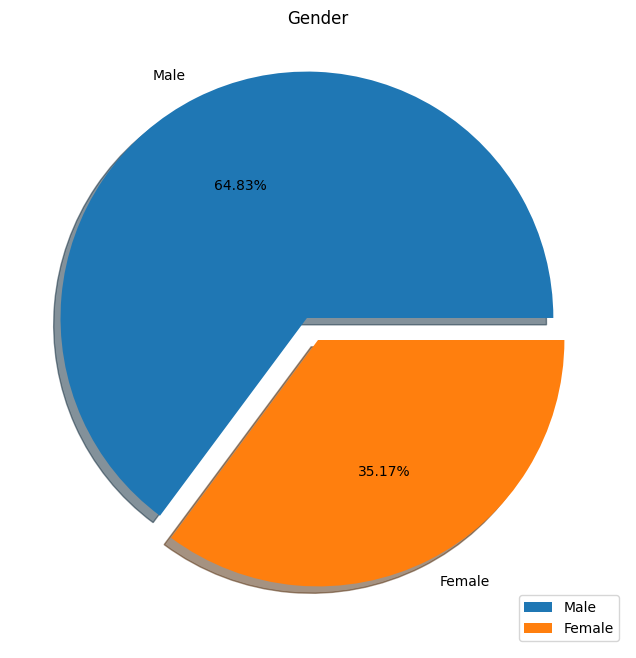

In [23]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

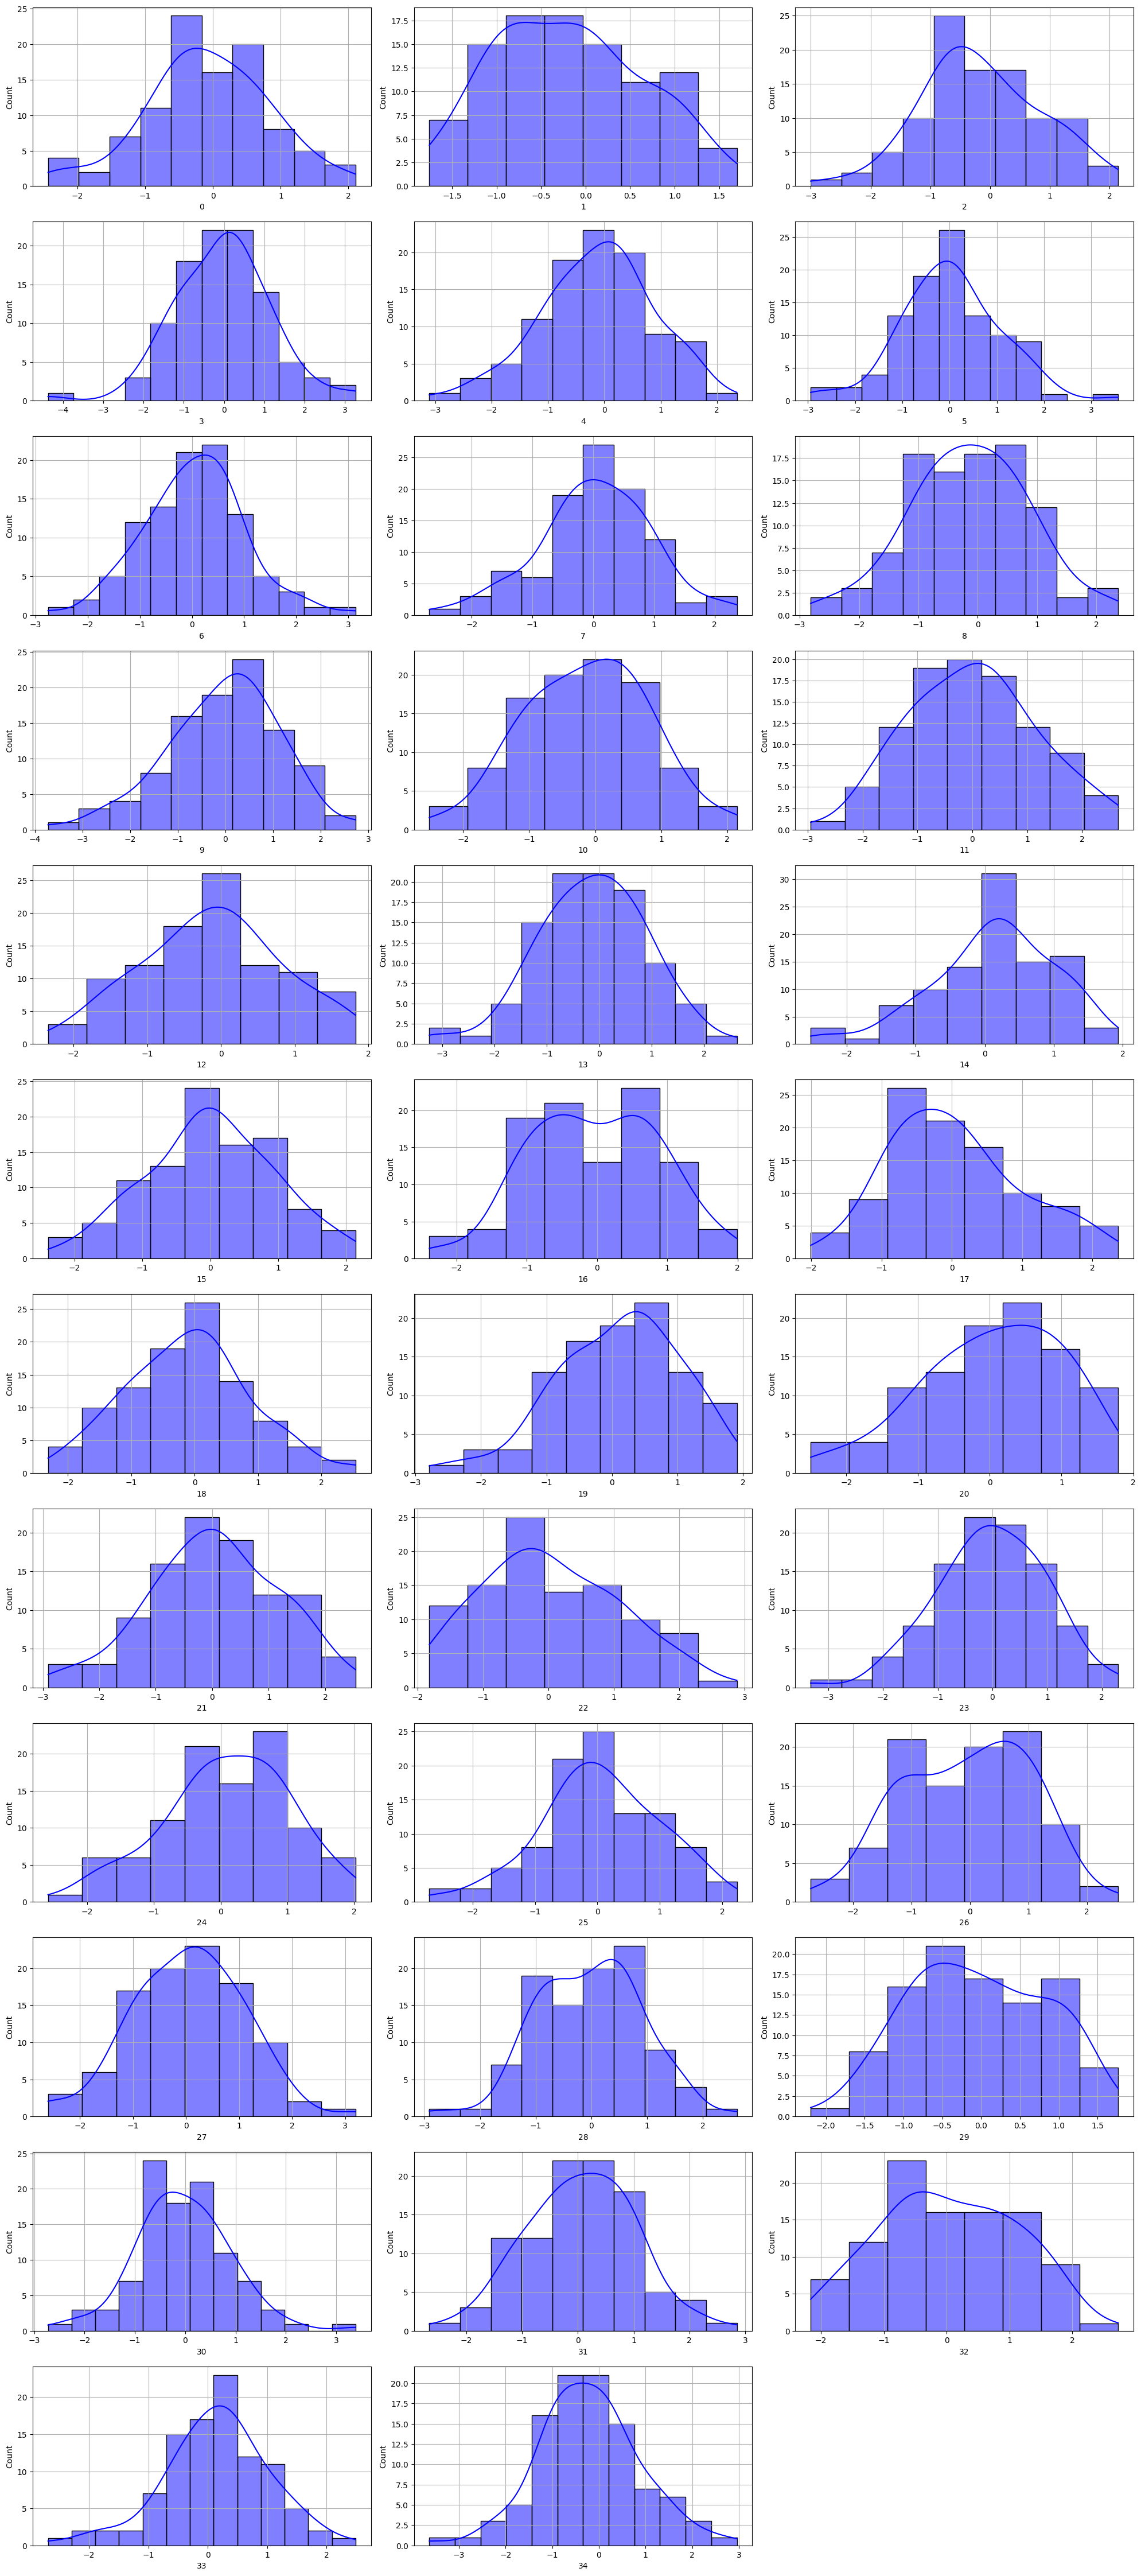

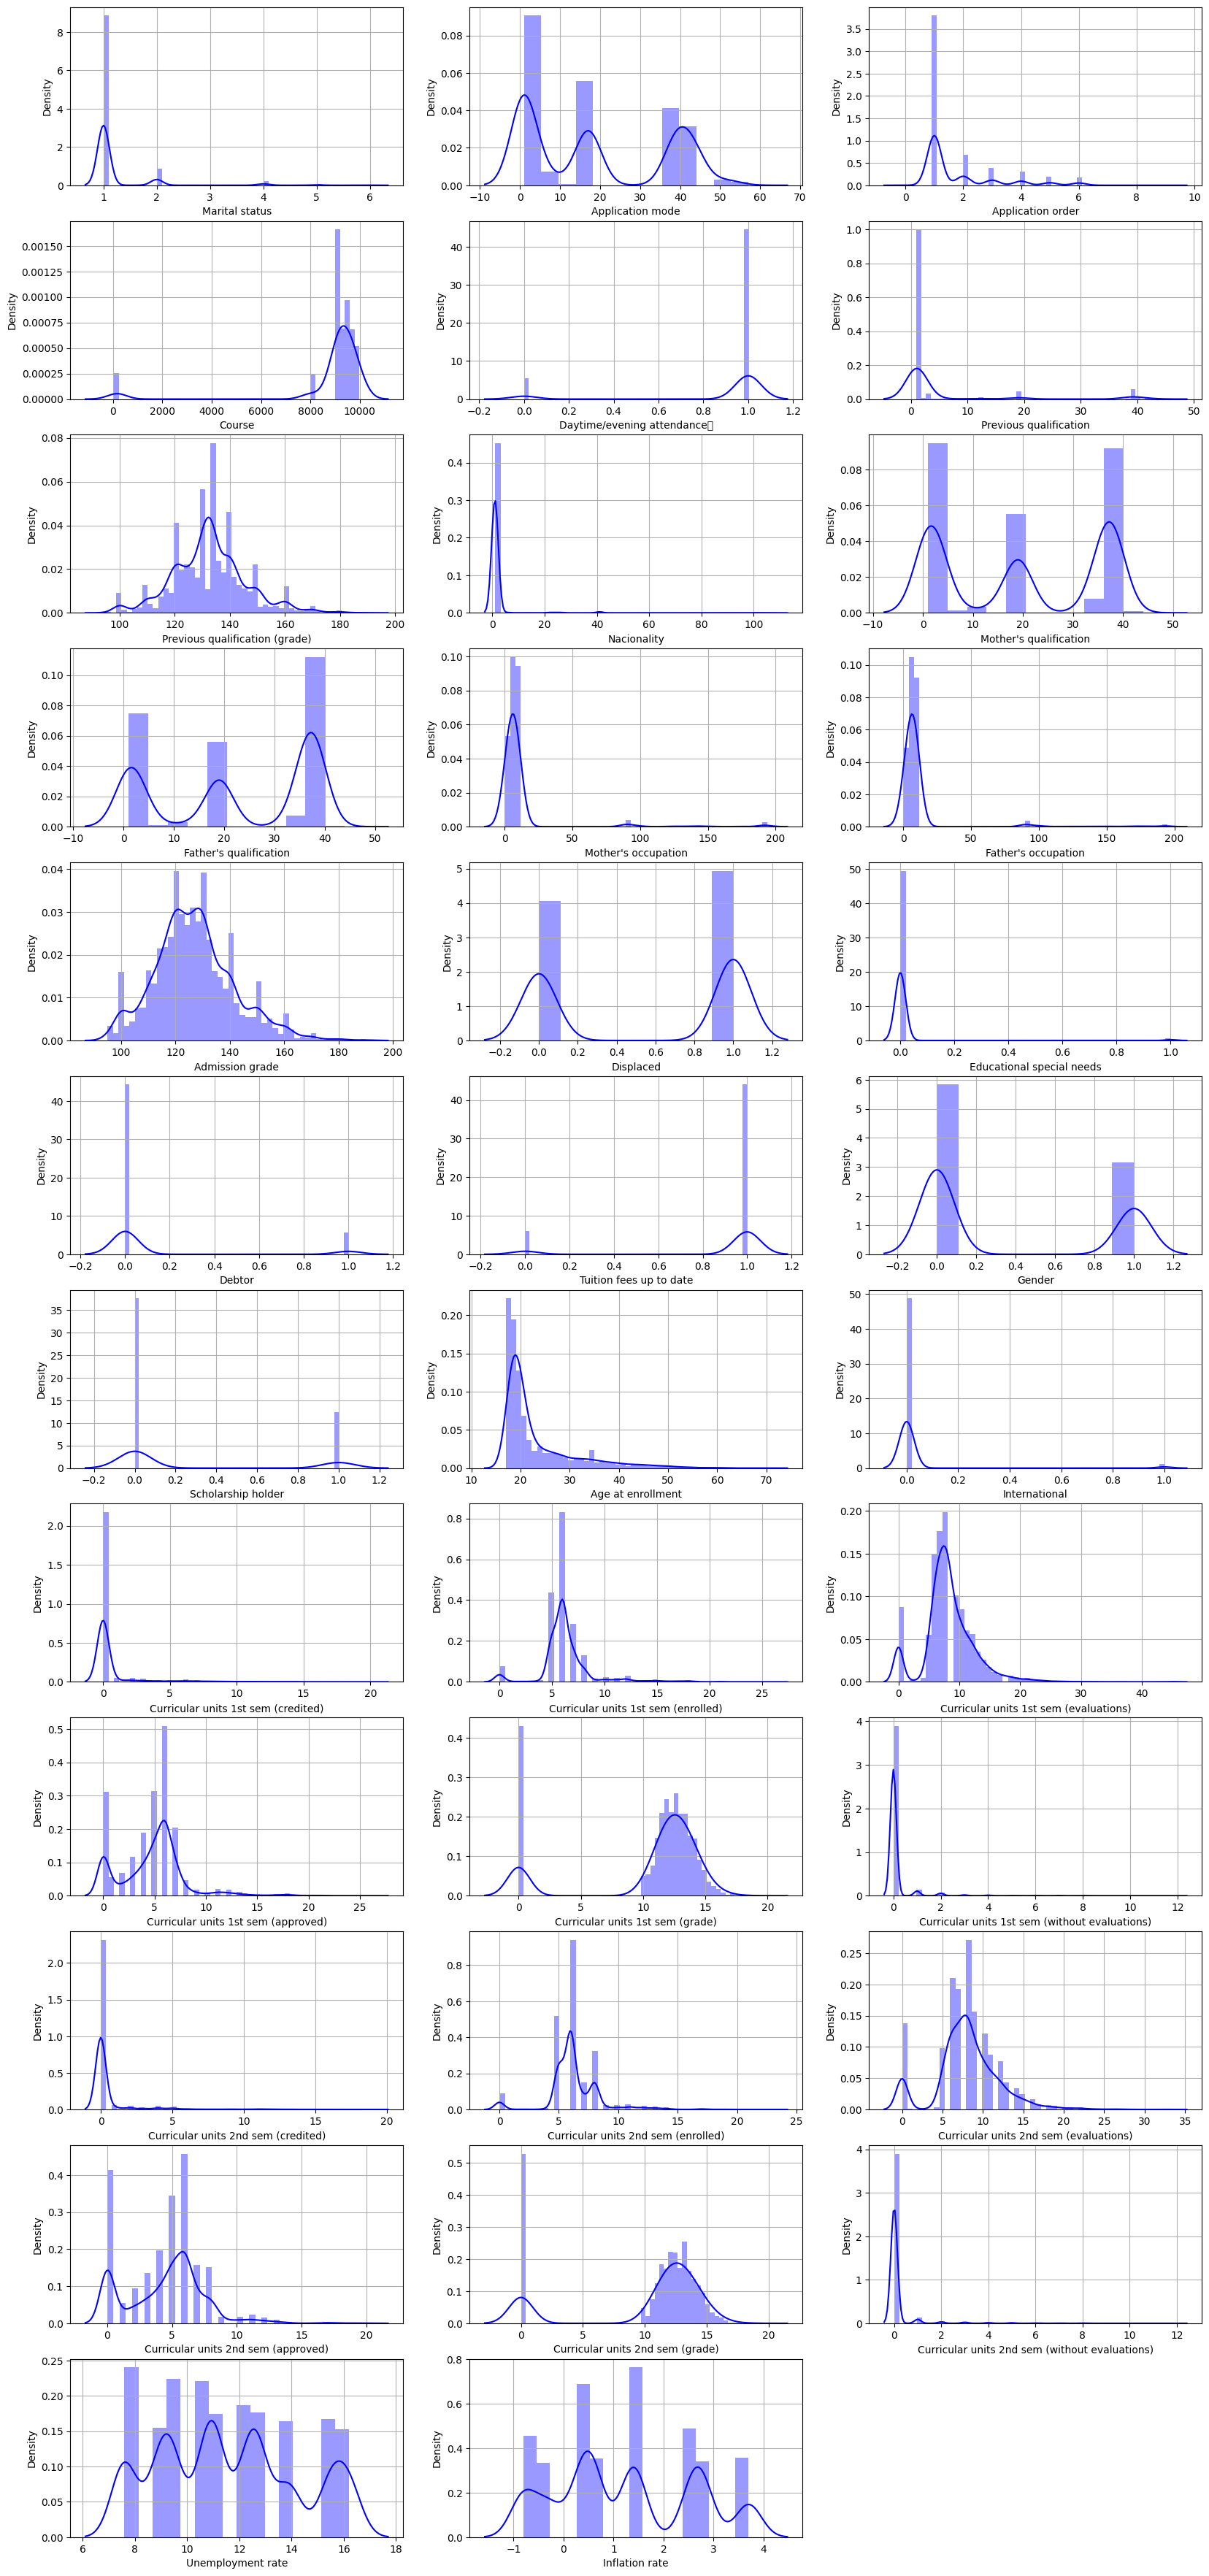

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dummy data with 35 columns
df = pd.DataFrame(np.random.randn(100, 35))

plt.figure(figsize=(20, 45))
for i in range(35):
    plt.subplot(12, 3, i + 1)
    sns.histplot(df.iloc[:, i], color='blue', kde=True)
    plt.grid(True)

plt.tight_layout()
plt.show()


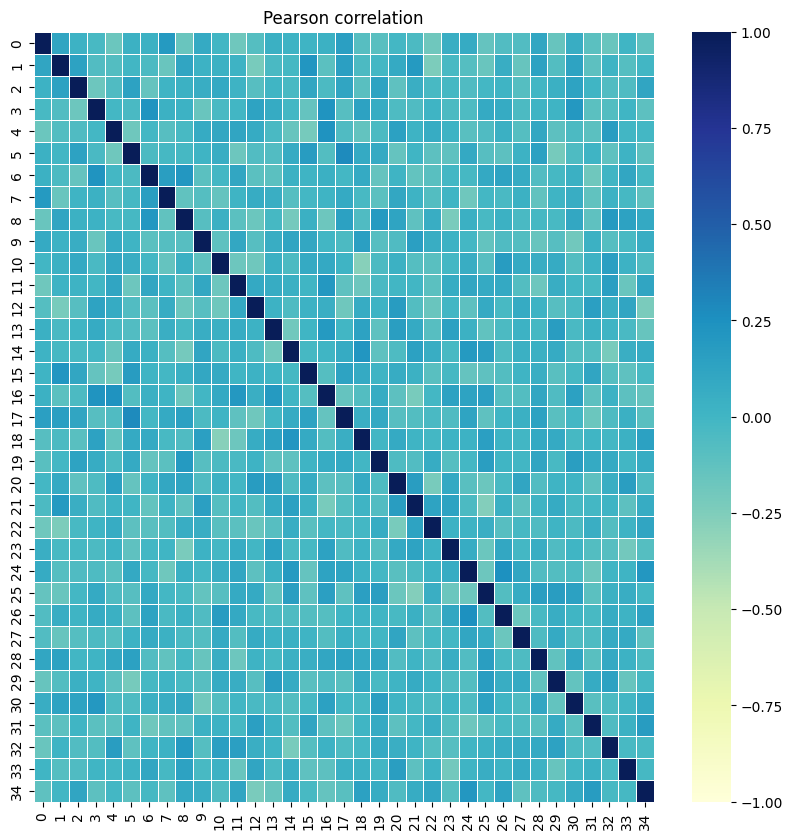

In [41]:
#feature selection
corr_matrix = df.corr(method="pearson")
plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson correlation")
plt.show()

# Standard Scaling the Data

In [ ]:
x = df.iloc[:, :36].values
#x = df[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
print(x)
x = StandardScaler().fit_transform(x)
x

In [43]:
y = df['Dropout'].values
y

array([1, 0, 1, ..., 1, 0, 0])

# Train & Test Splitting the Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Function to Measure Performance

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

In [50]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9146005509641874
Recall :  0.9146005509641874
Accuracy :  0.9146005509641874
F1 Score :  0.9146005509641874

 [[429  19]
 [ 43 235]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       448
           1       0.93      0.85      0.88       278

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726

******************************************************



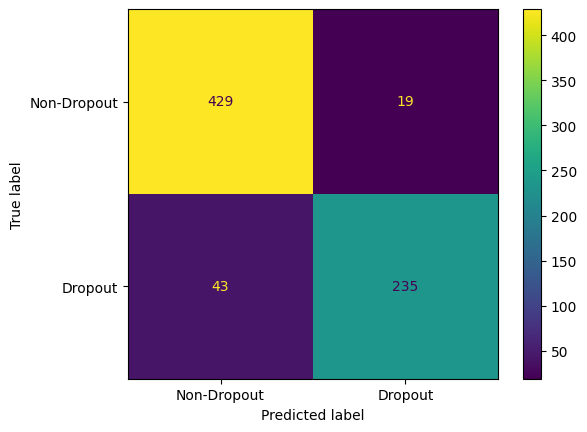

In [51]:
perform(y_pred_lr)

# Random Forest

In [66]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.918732782369146
Recall :  0.918732782369146
Accuracy :  0.918732782369146
F1 Score :  0.9187327823691461

 [[435  13]
 [ 46 232]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       448
           1       0.95      0.83      0.89       278

    accuracy                           0.92       726
   macro avg       0.93      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726

******************************************************



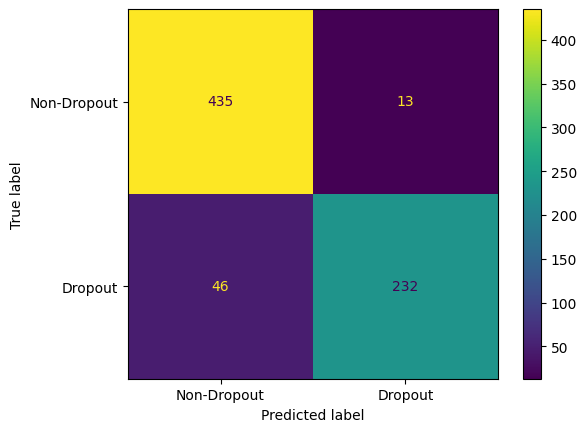

In [67]:
perform(y_pred_rf)

# Support Vector Classifier

In [114]:
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [115]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.9214876033057852
Recall :  0.9214876033057852
Accuracy :  0.9214876033057852
F1 Score :  0.9214876033057853

 [[436  12]
 [ 45 233]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       448
           1       0.95      0.84      0.89       278

    accuracy                           0.92       726
   macro avg       0.93      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

******************************************************



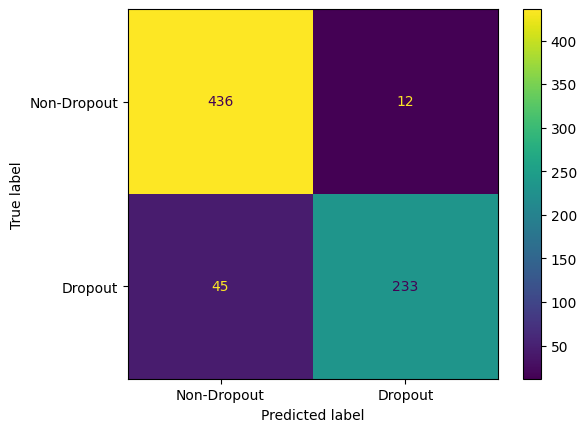

In [116]:
perform(y_pred_svc)

# Perceptron

In [150]:
model_mlp = Perceptron(alpha=0.001,l1_ratio=0.5,max_iter=100)
model_mlp.fit(x_train, y_train)

Perceptron(alpha=0.001, l1_ratio=0.5, max_iter=100)

In [151]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.8939393939393939
Recall :  0.8939393939393939
Accuracy :  0.8939393939393939
F1 Score :  0.8939393939393939

 [[416  32]
 [ 45 233]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       448
           1       0.88      0.84      0.86       278

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726

******************************************************



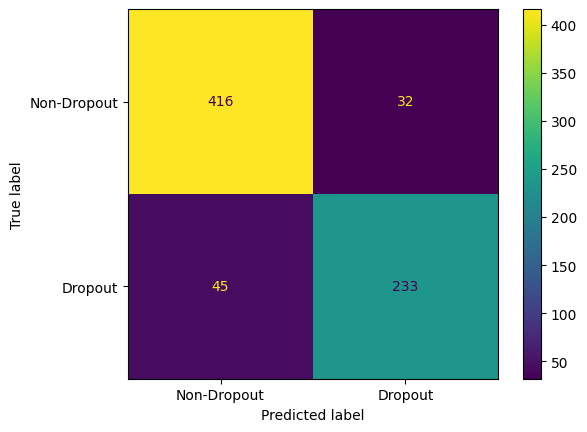

In [152]:
perform(y_pred_mlp)

# KNN Classifier

In [100]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred_i)
    error.append(accuracy)

Text(0, 0.5, 'Accuracy')

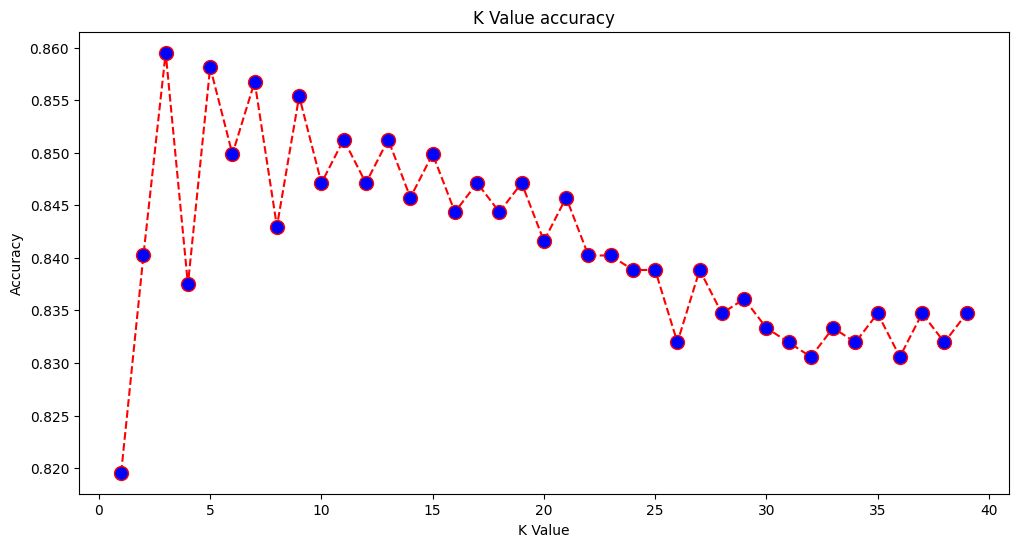

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [153]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.859504132231405
Recall :  0.859504132231405
Accuracy :  0.859504132231405
F1 Score :  0.859504132231405

 [[422  26]
 [ 76 202]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       448
           1       0.89      0.73      0.80       278

    accuracy                           0.86       726
   macro avg       0.87      0.83      0.85       726
weighted avg       0.86      0.86      0.86       726

******************************************************



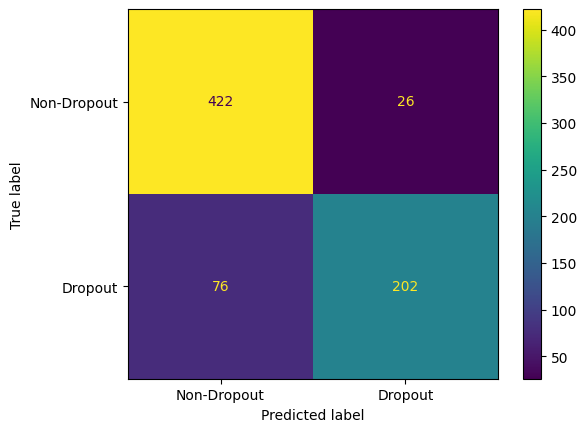

In [156]:
perform(y_pred_knn)

# Comparison

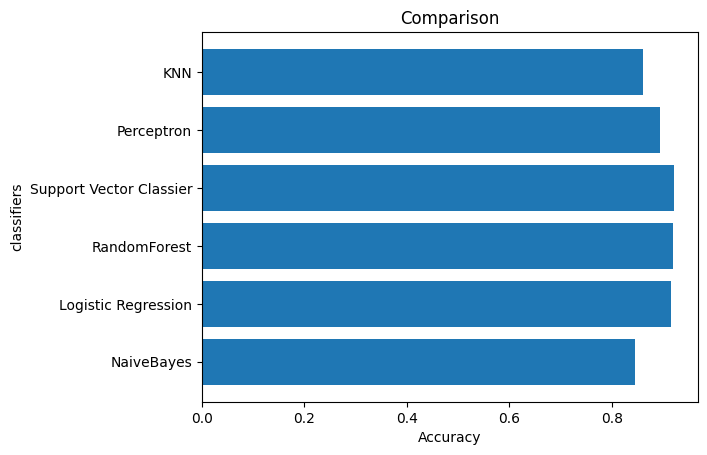

In [160]:
pred=[y_pred_nb,y_pred_lr,y_pred_rf,y_pred_svc,y_pred_mlp,y_pred_knn]
acc=[]
classifiers=["NaiveBayes","Logistic Regression","RandomForest","Support Vector Classier","Perceptron","KNN"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()

    